## Drilling Parameters Log

### Import Libraries

At the outset, we import the essential scientific and interactive-widget libraries: `Matplotlib` for plotting, `Pandas` and `NumPy` for data handling, `IPython` widgets for interactive controls, and a display helper. We also disable warning messages to keep the output clean. This establishes our analysis environment.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ipywidgets import interact, widgets
from IPython.display import display
import warnings

# Turn off all warnings
warnings.filterwarnings('ignore')


### Load Dataset
We load the drilling dataset (Well 58-32) from a CSV file into a Pandas DataFrame, using the timestamped index for later time-based filtering. Immediately, we peek at both the top and bottom of the table to confirm the breadth of the depth range (from near-surface to over 7,500 ft) and to verify that all expected columns—such as Rate of Penetration (ROP), weight on bit, temperatures, pressures, and H₂S readings—are present.

In [2]:
# Load your dataset with timestamp as the index
df = pd.read_csv(r"C:\Users\Otto Henry\CodingWorld\PE-Drilling Data Analytics\Datasets\Well_58-32_(Please keep confidential).csv")

In [3]:
df.head(7)

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.00,0.00,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.00,0.00,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.00,0.00,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.00,0.00,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.00,0.00,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31
5,90.39,27.55,413.16,125.93,0.00,0.00,94.52,34.73,91.18,32.88,...,61.85,61.99,1101.85,4170.95,96.58,-1230.69,-8485.61,-0.01,-0.02,0.31
6,91.39,27.85,450.72,137.37,0.76,344.67,94.52,34.73,91.21,32.89,...,61.85,62.07,1102.06,4171.75,96.72,-1230.69,-8485.61,-0.01,-0.02,0.31


In [4]:
df.tail(10)

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
7301,7527.15,2294.16,11.96,3.65,30.23,13709.75,138.17,58.98,120.27,49.04,...,1052.59,34.50,613.15,2321.02,78.25,4.98,34.34,-0.08,0.00,0.07
7302,7528.17,2294.47,14.47,4.41,31.48,14276.64,138.25,59.03,120.42,49.12,...,1114.37,29.55,614.88,2327.57,77.88,5.36,36.96,-0.08,0.01,0.06
7303,7529.18,2294.78,13.50,4.11,30.69,13918.37,138.40,59.11,120.53,49.18,...,1024.53,36.94,629.52,2382.99,78.63,5.36,36.96,-0.08,0.01,0.07
7304,7530.19,2295.09,14.65,4.47,29.99,13600.91,138.74,59.30,120.76,49.31,...,1024.53,38.12,653.85,2475.09,79.05,5.36,36.96,-0.07,0.01,0.07
7305,7531.20,2295.40,12.88,3.93,30.92,14022.68,138.93,59.41,121.14,49.52,...,1022.11,35.89,626.07,2369.93,76.89,5.36,36.96,-0.08,0.00,0.06
7306,7532.21,2295.71,10.81,3.29,30.55,13854.88,138.89,59.38,121.22,49.57,...,1049.76,34.91,609.49,2307.17,75.66,5.74,39.58,-0.07,0.02,0.06
7307,7533.22,2296.01,13.51,4.12,30.23,13709.75,138.89,59.38,121.14,49.52,...,1040.52,34.78,615.09,2328.37,76.51,5.74,39.58,-0.07,0.01,0.06
7308,7534.23,2296.32,12.62,3.85,29.95,13582.77,139.08,59.49,121.22,49.57,...,1059.97,34.72,635.76,2406.61,80.00,6.13,42.27,-0.08,0.01,0.07
7309,7535.24,2296.63,14.72,4.49,31.06,14086.17,139.31,59.62,121.33,49.63,...,999.78,36.49,627.15,2374.02,77.92,6.13,42.27,-0.07,0.02,0.07
7310,7536.25,2296.94,12.97,3.95,30.60,13877.55,139.39,59.66,121.26,49.59,...,1025.01,34.06,988.39,3741.46,77.88,6.13,42.27,-0.07,0.03,0.06


In [5]:
df.columns

Index(['Depth(ft)', 'Depth(m)', 'ROP(1 ft)', 'ROP(1 m)',
       'weight on bit (k-lbs)', 'weight on bit (kg)', 'Temp Out( degF)',
       'Temp Out( degC)', 'Temp In(degF)', 'Temp In(degC)', 'Pit Total (bbls)',
       'Pit Total (m3)', 'Pump Press (psi)', 'Pump Press (KPa)',
       'Hookload (k-lbs)', 'Hookload (kg)', 'Surface Torque (psi)',
       'Surface Torque (KPa)', 'Rotary Speed (rpm)', 'Flow In (gal/min)',
       'Flow In(liters/min)', 'Flow Out %', 'WH Pressure (psi)',
       'WH Pressure (KPa)', 'H2S Floor', 'H2S Cellar', 'H2S Pits'],
      dtype='object')

### Descriptive Statistics
A quick `df.describe()` (and its transposed form) generates count, mean, standard deviation and min/max values for each parameter over all 7,311 depth measurements. This not only checks data integrity (no unexpected NaNs or zero-only columns) but also reveals the typical operating ranges: e.g. average ROP ~42 ft/hr (σ≈76), typical WOB ~23 k-lbs, surface torque ~131 psi, and rotary speed ~55 rpm. These summary stats guide later axis limits and help identify outlier filtering thresholds.



In [6]:
df.describe()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
count,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,...,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000
mean,3835.043935,1168.864378,42.010324,12.804158,23.116699,10483.764002,126.059506,52.255297,118.315593,47.953090,...,903.132323,54.947292,716.254127,2711.315497,79.692834,-35.760875,-246.571280,-0.027372,0.004303,0.148833
std,2147.503980,654.527243,75.921118,23.139621,9.119495,4135.825227,12.259879,6.811023,11.933137,6.629486,...,335.832421,25.947654,141.784179,536.711275,11.909399,222.669489,1535.306539,0.042453,0.025282,0.115290
min,85.180000,25.960000,0.000000,0.000000,0.000000,0.000000,84.070000,28.930000,85.000000,29.440000,...,0.000000,0.000000,0.000000,0.000000,0.690000,-1231.830000,-8493.470000,-0.100000,-0.080000,-0.060000
25%,1970.395000,600.545000,11.400000,3.470000,18.310000,8303.850000,116.130000,46.740000,108.850000,42.695000,...,806.715000,38.090000,620.260000,2347.940000,72.650000,2.920000,20.130000,-0.070000,-0.010000,0.060000
50%,3851.850000,1173.990000,17.990000,5.480000,23.830000,10807.260000,124.860000,51.590000,117.220000,47.340000,...,967.440000,50.380000,700.210000,2650.580000,80.710000,5.940000,40.960000,-0.010000,0.000000,0.140000
75%,5691.585000,1734.710000,44.295000,13.500000,29.680000,13460.320000,136.490000,58.050000,126.860000,52.700000,...,1084.450000,75.965000,824.610000,3121.485000,88.845000,8.260000,56.950000,0.000000,0.020000,0.220000
max,7536.250000,2296.940000,2977.910000,907.620000,47.050000,21337.870000,151.700000,66.500000,146.310000,63.510000,...,1887.230000,271.580000,3317.510000,12558.140000,111.210000,17.410000,120.040000,0.780000,0.070000,0.720000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Depth(ft),7311.0,3835.043935,2147.503980,85.18,1970.395,3851.85,5691.585,7536.25
Depth(m),7311.0,1168.864378,654.527243,25.96,600.545,1173.99,1734.710,2296.94
ROP(1 ft),7311.0,42.010324,75.921118,0.00,11.400,17.99,44.295,2977.91
ROP(1 m),7311.0,12.804158,23.139621,0.00,3.470,5.48,13.500,907.62
weight on bit (k-lbs),7311.0,23.116699,9.119495,0.00,18.310,23.83,29.680,47.05
weight on bit (kg),7311.0,10483.764002,4135.825227,0.00,8303.850,10807.26,13460.320,21337.87
Temp Out( degF),7311.0,126.059506,12.259879,84.07,116.130,124.86,136.490,151.70
Temp Out( degC),7311.0,52.255297,6.811023,28.93,46.740,51.59,58.050,66.50
Temp In(degF),7311.0,118.315593,11.933137,85.00,108.850,117.22,126.860,146.31
Temp In(degC),7311.0,47.953090,6.629486,29.44,42.695,47.34,52.700,63.51


To focus on the drilling performance metrics most critical to bottomhole hydraulics and mechanical loading, we extract a pared-down DataFrame (`df1`) containing only Depth (ft), ROP, weight on bit, rotary speed, and surface torque. A quick head-count and inspection of the new structure confirm that we have a concise table ready for targeted visualization.

In [8]:
list = ['ROP(1 ft)','weight on bit (k-lbs)','Rotary Speed (rpm)', 'Surface Torque (KPa)']

In [9]:
df.head()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.0,0.0,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.0,0.0,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.0,0.0,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.0,0.0,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.0,0.0,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31


In [10]:
df1 = df[['Depth(ft)','ROP(1 ft)','weight on bit (k-lbs)','Rotary Speed (rpm)', 'Surface Torque (psi)']]
df1.head()

,Depth(ft),ROP(1 ft),weight on bit (k-lbs),Rotary Speed (rpm),Surface Torque (psi)
0,85.18,56.80,0.0,151.09,8.93
1,86.18,61.14,0.0,151.09,8.93
2,87.23,18.58,0.0,61.54,9.01
3,88.26,38.29,0.0,60.23,8.97
4,89.36,394.38,0.0,61.75,8.97


We isolate the ROP series itself to ensure its type and distribution look correct, then similarly glance at the Depth series. This step validates that ROP values align with their depth indices before moving on to visualization.

In [11]:
df1['ROP(1 ft)']

0        56.80
1        61.14
2        18.58
3        38.29
4       394.38
         ...  
7306     10.81
7307     13.51
7308     12.62
7309     14.72
7310     12.97
Name: ROP(1 ft), Length: 7311, dtype: float64

In [12]:
df1['Depth(ft)'].head()

0    85.18
1    86.18
2    87.23
3    88.26
4    89.36
Name: Depth(ft), dtype: float64

### ROP Plot
An inverted-Y scatter plot of ROP vs. Depth provides our first visual: it reveals how drilling penetration rate varies with depth. Inverting the y-axis simulates the true wellbore profile, with shallow depths at the top and deeper intervals below.

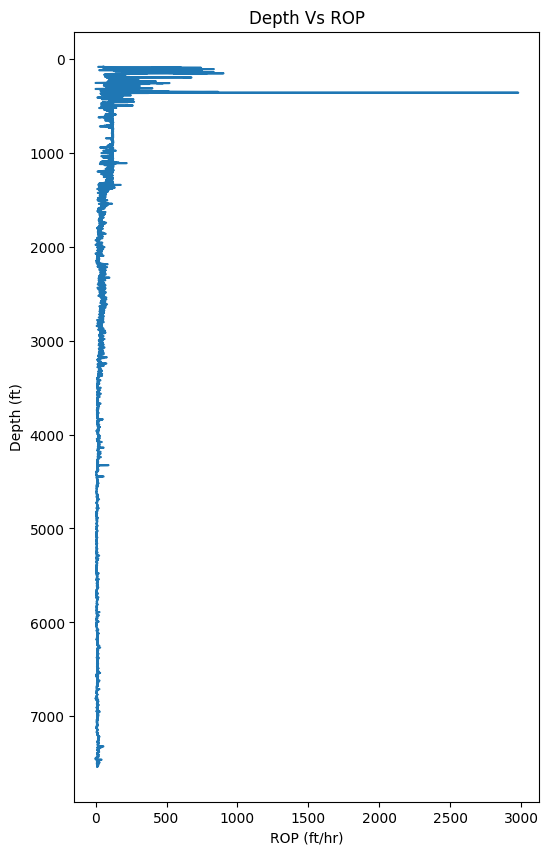

In [13]:
plt.figure(figsize=(6,10)) # Define the canvas


plt.plot(df1['ROP(1 ft)'], df1['Depth(ft)']) # Make the plot


plt.xlabel("ROP (ft/hr)") # Configure the plot
plt.ylabel("Depth (ft)")
plt.title("Depth Vs ROP")
plt.gca().invert_yaxis()


plt.show() # Show the plot


In [14]:
df1['Depth(ft)'] >= 700

0       False
1       False
2       False
3       False
4       False
        ...  
7306     True
7307     True
7308     True
7309     True
7310     True
Name: Depth(ft), Length: 7311, dtype: bool

### Filtering Shallow depths
Recognizing that the shallowest 700 ft may include rig-up and surface noise, we filter out depths less than 700 ft and re-plot the ROP curve. After noting a few anomalously high spikes, we also trim out any ROP values exceeding 150 ft/hr to eliminate outliers, producing a cleaner ROP-depth trend that better reflects steady-state drilling intervals.

In [15]:
df1 = df1[df1['Depth(ft)'] >= 700]


In [16]:
df1.head()

,Depth(ft),ROP(1 ft),weight on bit (k-lbs),Rotary Speed (rpm),Surface Torque (psi)
583,701.00,120.42,12.36,77.59,122.81
584,702.02,116.82,12.02,82.90,117.21
585,703.05,122.64,11.05,96.85,106.80
586,704.07,118.18,16.45,77.35,119.65
587,705.09,111.03,15.29,81.93,114.50


In [17]:
df1.shape

(6728, 5)

### First ROP vs. Depth Plot
We produce our inaugural plot: ROP on the x-axis versus true vertical depth on the y-axis, inverted so that deeper measurements extend downward on the screen—just like a geophysical log. This immediate visual highlights how penetration rate varies with depth, pinpointing zones of low ROP that may correspond to hard formations or bit wear, and high spikes that may indicate washouts or cavings.

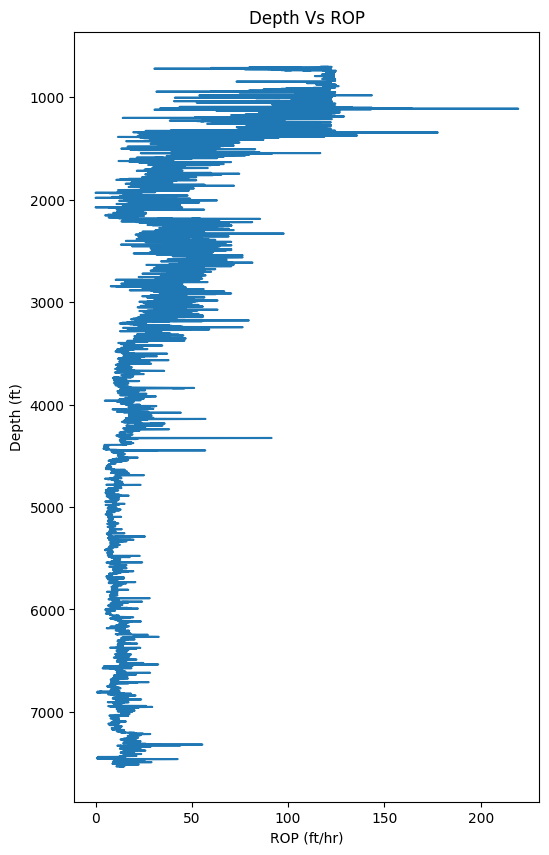

In [18]:
plt.figure(figsize=(6,10))

plt.plot(df1['ROP(1 ft)'], df1['Depth(ft)'])

plt.xlabel("ROP (ft/hr)")
plt.ylabel("Depth (ft)")
plt.title("Depth Vs ROP")
plt.gca().invert_yaxis()

plt.show()


### Outlier Removal
To further clean the log, any ROP values above 150 ft/hr—likely sensor spikes or non-drilling events—are excluded. After removing those few extreme points, we plot again. The resulting curve is smoother and more geologically meaningful, helping to delineate lithology changes and mechanical phenomena without distraction from anomalous readings.

In [19]:
df1 = df1[df1['ROP(1 ft)'] < 150]

df1.shape

(6724, 5)

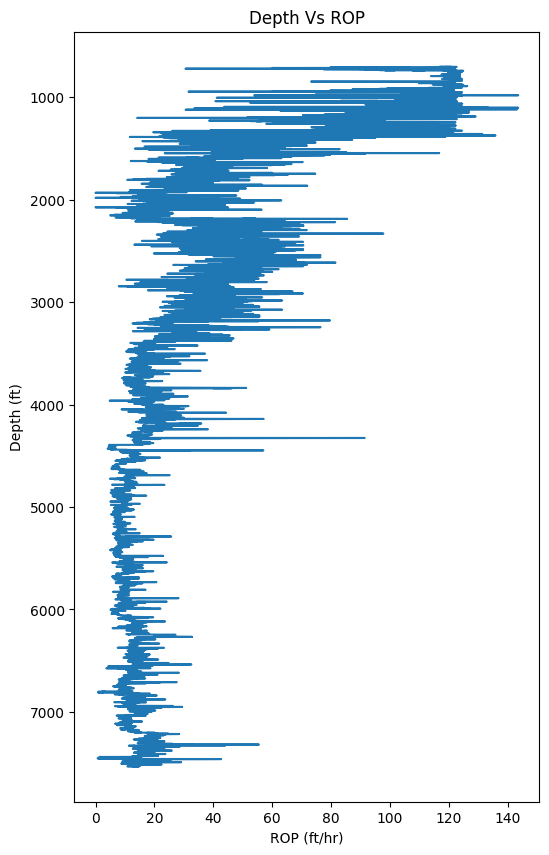

In [20]:
plt.figure(figsize=(6,10))

plt.plot(df1['ROP(1 ft)'], df1['Depth(ft)'])

plt.xlabel("ROP (ft/hr)")
plt.ylabel("Depth (ft)")
plt.title("Depth Vs ROP")
plt.gca().invert_yaxis()

plt.show()


In [21]:
# df1['ROP(1 ft)'].min()
df1['ROP(1 ft)'].max()

np.float64(143.56)

### Focusing on a Depth Window
We take a closer look at a specific interval—rows 2,000 through 2,700—so that our multi-track visualization covers a manageable 500–600 ft section in detail. This slicing technique is useful when analyzing a particular zone of interest, such as a target pay zone or an interval with drilling issues.

In [22]:
df1 = df1[2000:2700]

### Four-Track Multi-Panel Plot
Using Matplotlib subplots, we generate four side-by-side tracks for ROP, WOB, Surface Torque and Rotary Speed over the chosen interval. Each track shares a common depth axis (inverted), yielding a compact “drilling parameter log” that mimics a traditional well log: you can instantly correlate spikes in torque with drops in ROP or fluctuations in WOB, making mechanical cause-and-effect relationships transparent.

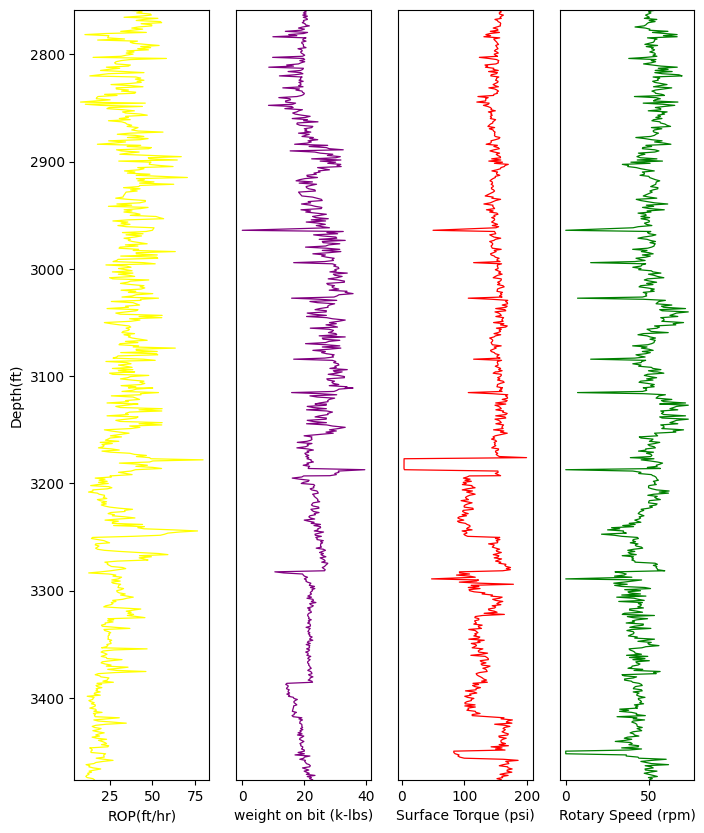

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize =(8,10))

ax[0].plot(df1['ROP(1 ft)'], df1['Depth(ft)'], linewidth=0.9, color='yellow')
ax[1].plot(df1['weight on bit (k-lbs)'], df1['Depth(ft)'], color='purple', linewidth=0.9)
ax[2].plot(df1['Surface Torque (psi)'], df1['Depth(ft)'], color='red', linewidth=0.9)
ax[3].plot(df1['Rotary Speed (rpm)'], df1['Depth(ft)'], color='green', linewidth=0.9)

for i in range(len(ax)):
    ax[i].set_ylim(df1['Depth(ft)'].min(), df1['Depth(ft)'].max())
    ax[i].invert_yaxis()
    if i != 0:
        ax[i].set_yticks([])

ax[0].set_ylabel("Depth(ft)")
ax[0].set_xlabel("ROP(ft/hr)")
ax[1].set_xlabel("weight on bit (k-lbs)")
ax[2].set_xlabel('Surface Torque (psi)')
ax[3].set_xlabel('Rotary Speed (rpm)')

# ax[0].set_xlim(df1['ROP(1 ft)'].min(), df1['ROP(1 ft)'].max())
fig.show();


### Creating an Interactive Plotting Function
We encapsulate the four-track plotting logic into a function `plotting(depth)` that accepts a depth cutoff and redraws the logs down to that point. By linking an `ipywidgets.Play` button to a `FloatSlider`, we enable an animated “drilling progression” view—automatically stepping through depth and dynamically updating the log tracks. This brings the static plot to life and lets engineers explore the drilling window in real time.

In [24]:
def plotting(depth):
    df2 = df1[df1['Depth(ft)'] <= depth]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize =(8,10))
    
    ax[0].plot(df2['ROP(1 ft)'], df2['Depth(ft)'], linewidth=0.9, color='yellow')
    ax[1].plot(df2['weight on bit (k-lbs)'], df2['Depth(ft)'], color='purple', linewidth=0.9)
    ax[2].plot(df2['Surface Torque (psi)'], df2['Depth(ft)'], color='red', linewidth=0.9)
    ax[3].plot(df2['Rotary Speed (rpm)'], df2['Depth(ft)'], color='green', linewidth=0.9)

    for i in range(len(ax)):
        ax[i].set_ylim(df2['Depth(ft)'].min(), df2['Depth(ft)'].max())
        ax[i].invert_yaxis()
        if i != 0:
            ax[i].set_yticks([])

    ax[0].set_ylabel("Depth(ft)")
    ax[0].set_xlabel("ROP(ft/hr)")
    ax[1].set_xlabel("weight on bit (k-lbs)")
    ax[2].set_xlabel('Surface Torque (psi)')
    ax[3].set_xlabel('Rotary Speed (rpm)')

    # ax[0].set_xlim(df1['ROP(1 ft)'].min(), df1['ROP(1 ft)'].max())
    fig.show();


In [25]:
def plotting(depth):
    df2 = df1[df1['Depth(ft)'] <= depth]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize =(6,8))
    ax[0].plot(df2['ROP(1 ft)'], df2['Depth(ft)'])
    ax[1].plot(df2['weight on bit (k-lbs)'], df2['Depth(ft)'], color='purple')
    ax[2].plot(df2['Surface Torque (psi)'], df2['Depth(ft)'], color='red')
    ax[3].plot(df2['Rotary Speed (rpm)'], df2['Depth(ft)'], color='green')

    for i in range(len(ax)):
        ax[i].set_ylim(df1['Depth(ft)'].min(), df1['Depth(ft)'].max())
        ax[i].invert_yaxis()
        ax[i].xaxis.set_label_position('top')
        if i != 0:
            ax[i].set_yticks([])


    ax[0].set_ylabel("Depth(ft)")
    ax[0].set_xlabel("ROP(ft/hr")
    ax[0].set_xlim(df2['ROP(1 ft)'].min(), df2['ROP(1 ft)'].max())
    # ax[0].set_ylim(df1['Depth(ft)'].min(), df1['Depth(ft)'].max())
    ax[1].set_xlabel("weight on bit (k-lbs)")
    ax[2].set_xlabel('Surface Torque (psi)')
    ax[3].set_xlabel('Rotary Speed (rpm)')
    

### Lets create an animation

In [26]:
# Create a slider for controlling depth or time
depth_slider = widgets.FloatSlider(
    value=df1['Depth(ft)'].min(),
    min=df1['Depth(ft)'].min(),
    max=df1['Depth(ft)'].max(),
    step=2,
    description='Depth:'
)

play_button = widgets.Play(
    interval=300, # Adjust the interval (milliseconds) as needed
    value=df1['Depth(ft)'].min(),
    min=df1['Depth(ft)'].min(),
    max=df1['Depth(ft)'].max(),
    step=2,
    description="Play",
    disabled=False
)

widgets.jslink((play_button, 'value'), (depth_slider, 'value'))

# Display the widgets
display(widgets.HBox([play_button]))
#display(depth_slider)
# widgets.interactive(log_plot1(df), depth=depth_slider)
widgets.interactive(plotting, depth=depth_slider)



interactive(children=(FloatSlider(value=2758.37, description='Depth:', max=3476.23, min=2758.37, step=2.0), Ou…

### Advanced Seven-Track Log Function `(log_plot1)`
Finally, we define `log_plot1(depth)`, which expands our view to seven tracks—adding temp-out, temp-in, pit total, pump pressure, and hookload alongside ROP, WOB and torque. Gridlines, top-axis labels, and synced y-limits emulate industry-standard log displays. We then wire up another Play/Slider pair so you can animate the full drilling-parameter profile from surface to TD, offering a holistic, live-style view of downhole conditions as drilling progresses.

In [27]:
def log_plot1(depth):
    logs = df[df.index <= depth]
    logs = logs.sort_values(by='Depth(ft)')
    top = 0
    bot = 2500
    
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(10, 10))
    ax[0].plot(logs['ROP(1 ft)'], logs['Depth(ft)'], color='green')
    ax[1].plot(logs['weight on bit (k-lbs)'], logs['Depth(ft)'], color='brown')
    ax[2].plot(logs['Temp Out( degF)'], logs['Depth(ft)'], color='black')
    ax[3].plot(logs['Temp In(degF)'], logs['Depth(ft)'], color='blue')
    ax[4].plot(logs['Pit Total (bbls)'], logs['Depth(ft)'], color='purple')
    ax[5].plot(logs['Pump Press (psi)'], logs['Depth(ft)'], color='red')
    ax[6].plot(logs['Hookload (k-lbs)'], logs['Depth(ft)'], color='violet')
    
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].xaxis.set_label_position('top')
        ax[i].invert_yaxis()
        ax[i].grid()
        # Remove ytick labels for all subplots except the first one
        if i != 0:
            ax[i].set_yticks([])
    
    ax[0].set_xlabel("ROP(ft/h)", fontsize = 8)
    ax[0].set_xlim(df['ROP(1 ft)'].min(), 150)
    ax[0].set_ylabel("Depth(ft)",fontsize = 10)
    ax[1].set_xlabel("WOB (klbs)", fontsize = 8)
    ax[1].set_xlim(df['weight on bit (k-lbs)'].min(), df['weight on bit (k-lbs)'].max())
    ax[2].set_xlabel("Rotary Speed (rpm)", fontsize = 8)
    ax[2].set_xlim(df['Rotary Speed (rpm)'].min(),df['Rotary Speed (rpm)'].max())
    ax[3].set_xlabel("Surface Torque (psi)", fontsize = 8)
    ax[3].set_xlim(df['Surface Torque (psi)'].min(), df['Surface Torque (psi)'].max())
    ax[4].set_xlabel("Pit Total(bbls)", fontsize = 8)
    ax[4].set_xlim(df['Pit Total (bbls)'].min(), df['Pit Total (bbls)'].max())
    ax[5].set_xlabel("Pump Press (psi)", fontsize = 8)
    ax[5].set_xlim(df['Pump Press (psi)'].min(), df['Pump Press (psi)'].max())
    ax[6].set_xlabel("Hookload (klbs)", fontsize = 8)
    ax[6].set_xlim(df['Hookload (k-lbs)'].min(), df['Hookload (k-lbs)'].max())

    
    fig.suptitle('Well_58-32', fontsize=20,y=0.94)

### Animation

In [42]:
# Create a slider for controlling depth or time
depth_slider = widgets.FloatSlider(
    value=df['Depth(ft)'].min(),
    min=df['Depth(ft)'].min(),
    max=df['Depth(ft)'].max(),
    step=5,
    description='Depth:'
)

play_button = widgets.Play(
    interval=100,  # Adjust the interval (milliseconds) as needed
    value=df['Depth(ft)'].min(),
    min=df['Depth(ft)'].min(),
    max=df['Depth(ft)'].max(),
    step=5,
    description="Play",
    disabled=False
)

widgets.jslink((play_button, 'value'), (depth_slider, 'value'))


# Display the widgets
display(widgets.HBox([play_button]))
#display(depth_slider)
# widgets.interactive(log_plot1(df), depth=depth_slider)
widgets.interactive(log_plot1, depth=depth_slider)



interactive(children=(FloatSlider(value=85.18, description='Depth:', max=7536.25, min=85.18, step=5.0), Output…

_**Author: Destiny Otto**_